# Make figures from sim3 results version 2

Three layers, 2 edges each regulator, scale-free mRNA and TF, 50+50+50 nodes. 200. Fine-grained constraints.
- "sim3_ggm_three_layer_v2_batch_2024_08_07_22_31_38" Scale 0.8

Three layers, 5 edges each regulator, scale-free mRNA and TF, 50+50+50 nodes. 200. Fine-grained constraints.
- "sim3_ggm_three_layer_v2_batch_2024_08_07_16_41_06" Scale 0.75
- “sim3_ggm_three_layer_v2_batch_2024_08_07_22_26_33” Scale 0.72  # not used



In [11]:
import numpy as np
from importlib import reload
from iddn_paper import sim3_read_draw_sim_res as sim3

reload(sim3)

<module 'iddn_extra.sim3_read_draw_sim_res' from 'E:\\OneDrive - Virginia Tech\\x_code\\ddn\\iDDN\\src\\iddn_extra\\sim3_read_draw_sim_res.py'>

In [12]:
node = 5
if node == 5:
    exp_name = "sim3_ggm_three_layer_v2_batch_2024_08_07_16_41_06"
else:
    exp_name = "sim3_ggm_three_layer_v2_batch_2024_08_07_22_31_38"

## P1: Compare iDDN, JGL, and iDINGO

In [13]:
p1_comm_iddn, p1_diff_iddn, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=6, msk_level_in=6, mrna_only=False, method='iddn')
p1_comm_jgl, p1_diff_jgl, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=6, mrna_only=False, method='jgl')
p1_comm_idingo, p1_diff_idingo, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=6, mrna_only=False, method='idingo')


['dep_est']
(32, 40, 16, 2, 150, 150)
['dep_est']
(32, 40, 17, 2, 150, 150)
['R1', 'R2', 'diffscore']
(5, 150, 150)
['R1', 'R2', 'diffscore']
(5, 150, 150)
['R1', 'R2', 'diffscore']
(5, 150, 150)


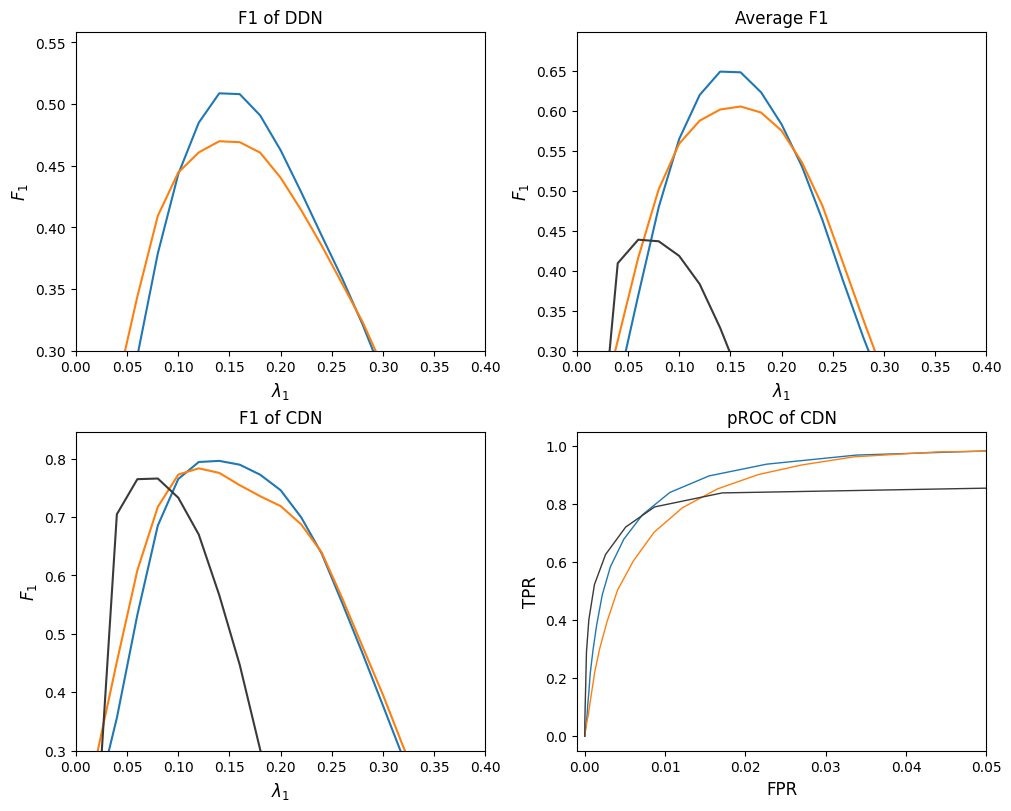

In [14]:
xrange = np.arange(0.02, 0.81, 0.02)
if node==2:
    xlim = [-0.0002, 0.005]
else:
    xlim = [-0.001, 0.05]
fig = sim3.draw_F1_pROC_curves_for_methods(
    # [p1_comm_iddn, p1_comm_jgl],
    [p1_comm_iddn, p1_comm_jgl, p1_comm_idingo],
    # [p1_diff_iddn, p1_diff_jgl],
    [p1_diff_iddn, p1_diff_jgl, p1_diff_idingo],
    xlim=xlim,
    xlim_1d=[0, 0.4],
    ylim_1d=[0.3, 1.0],
    xrange=xrange,
)
fig.savefig(f"./temp/node_{node}_compare.png")

## P2: iDDN vs. DDN, benefits of constraints

In [15]:
p2_comm_iddn3, p2_diff_iddn3, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=0, msk_level_in=3, mrna_only=False, method='iddn')
p2_comm_iddn7, p2_diff_iddn7, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=0, msk_level_in=6, mrna_only=False, method='iddn')
p2_comm_iddn10, p2_diff_iddn10, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=0, msk_level_in=9, mrna_only=False, method='iddn')
p2_comm_ddn, p2_diff_ddn, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=0, mrna_only=False, method='ddn')


['dep_est']
(32, 40, 16, 2, 150, 150)
['dep_est']
(32, 40, 16, 2, 150, 150)
['dep_est']
(32, 40, 16, 2, 150, 150)
['dep_est']
(32, 40, 16, 2, 150, 150)


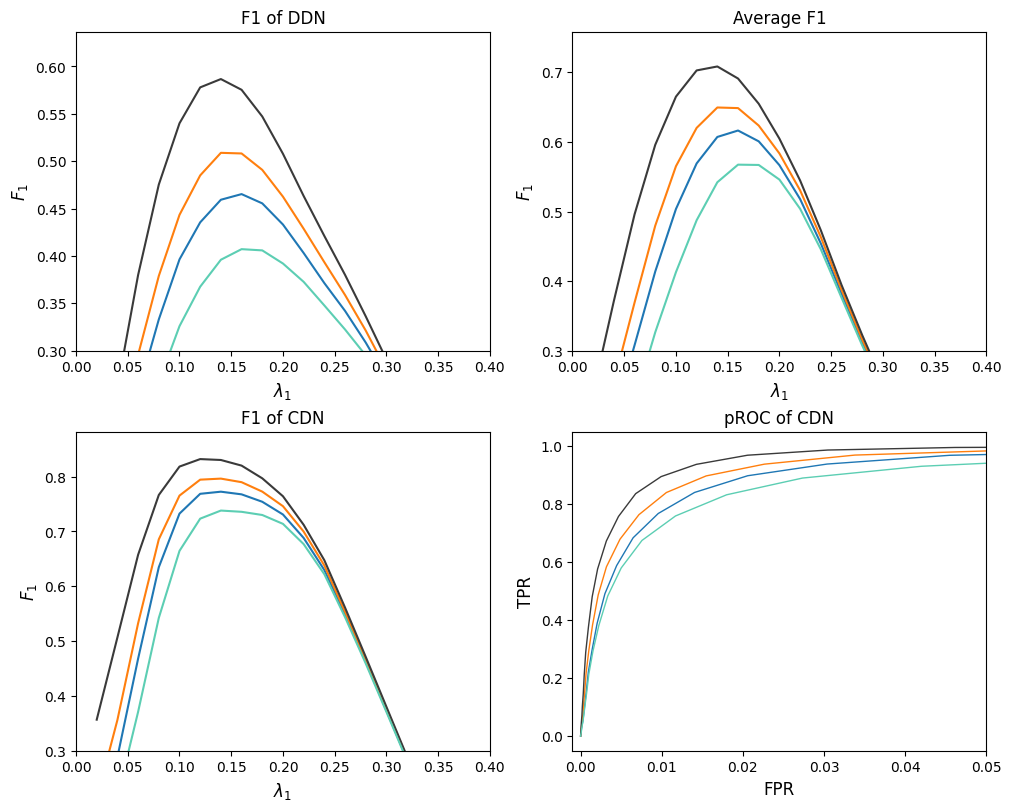

In [16]:
xrange = np.arange(0.02, 0.81, 0.02)
if node==2:
    xlim = [-0.0002, 0.0025]
else:
    xlim = [-0.001, 0.05]
fig = sim3.draw_F1_pROC_curves_for_methods(
    [p2_comm_iddn3, p2_comm_iddn7, p2_comm_iddn10, p2_comm_ddn],
    [p2_diff_iddn3, p2_diff_iddn7, p2_diff_iddn10, p2_diff_ddn],
    xlim=xlim,
    xlim_1d=[0, 0.4],
    ylim_1d=[0.3, 1.0],
    xrange=xrange,
)
fig.savefig(f"./temp/node_{node}_iddn_ddn_constraints_basic.png")

## P3: JGL + post vs. JGL, benefits of constraints

In [17]:
p3_comm_iddn, p3_diff_iddn, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=6, msk_level_in=6, mrna_only=False, method='iddn')
p3_comm_jgl, p3_diff_jgl, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=0, mrna_only=False, method='jgl')
p3_comm_jgl_c, p3_diff_jgl_c, _, _ = sim3.read_one_res(exp_name, n_sample=200, msk_level=6, mrna_only=False, method='jgl')

['dep_est']
(32, 40, 16, 2, 150, 150)
['dep_est']
(32, 40, 17, 2, 150, 150)
['dep_est']
(32, 40, 17, 2, 150, 150)


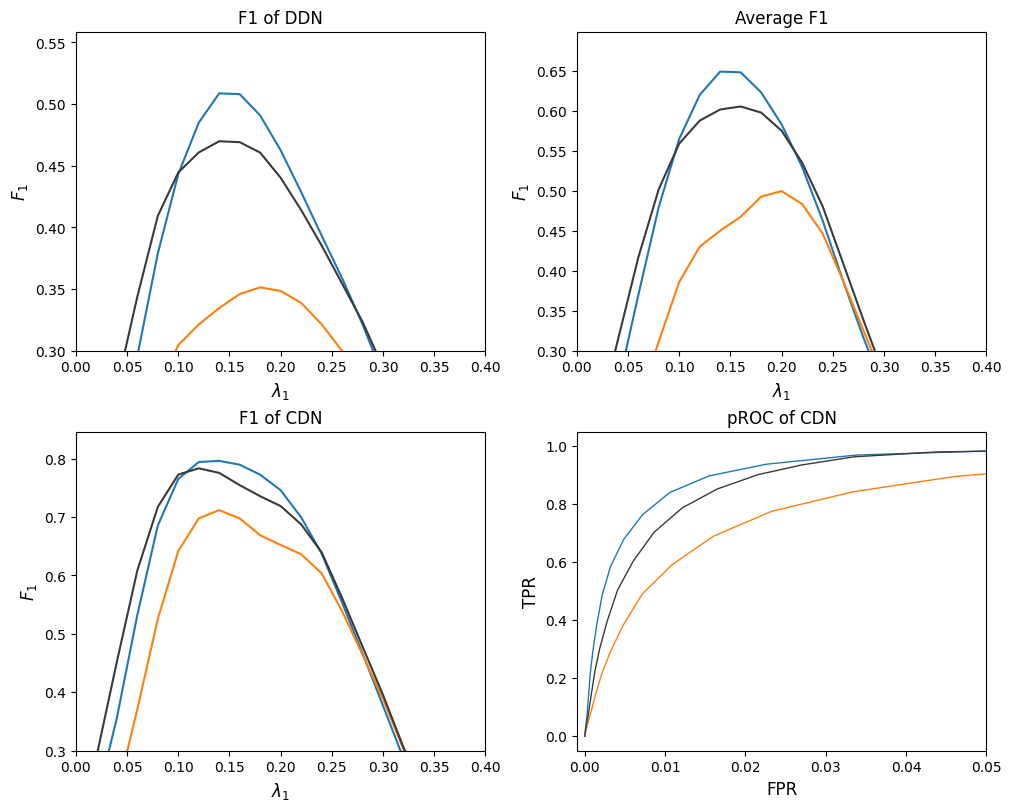

In [18]:
xrange = np.arange(0.02, 0.81, 0.02)
if node==2:
    xlim = [-0.0002, 0.005]
else:
    xlim = [-0.001, 0.05]
fig = sim3.draw_F1_pROC_curves_for_methods(
    [p3_comm_iddn, p3_comm_jgl, p3_comm_jgl_c],
    [p3_diff_iddn, p3_diff_jgl, p3_diff_jgl_c],
    xlim=xlim,
    xlim_1d=[0, 0.4],
    ylim_1d=[0.3, 1.0],
    xrange=xrange,
)
fig.savefig(f"./temp/node_{node}_iddn_jgl_constraints_basic.png")

## P4: mRNA vs. mRNA + others, iDDN without constraints, benefits of multi-omics

In [19]:
n_sample = 200
p4_comm_iddn0, p4_diff_iddn0, _, _ = sim3.read_one_res(exp_name, n_sample=n_sample, msk_level=0, msk_level_in=0, mrna_only=True, method='iddn', subset='mrna')
p4_comm_iddn1, p4_diff_iddn1, _, _ = sim3.read_one_res(exp_name, n_sample=n_sample, msk_level=0, msk_level_in=0, mrna_only=True, method='iddn', subset='mrna_tf')
p4_comm_iddn2, p4_diff_iddn2, _, _ = sim3.read_one_res(exp_name, n_sample=n_sample, msk_level=0, msk_level_in=0, mrna_only=True, method='iddn', subset='mrna_mirna')
p4_comm_iddn3, p4_diff_iddn3, _, _ = sim3.read_one_res(exp_name, n_sample=n_sample, msk_level=0, msk_level_in=0, mrna_only=True, method='iddn', subset='mrna_tf_mirna')

['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)


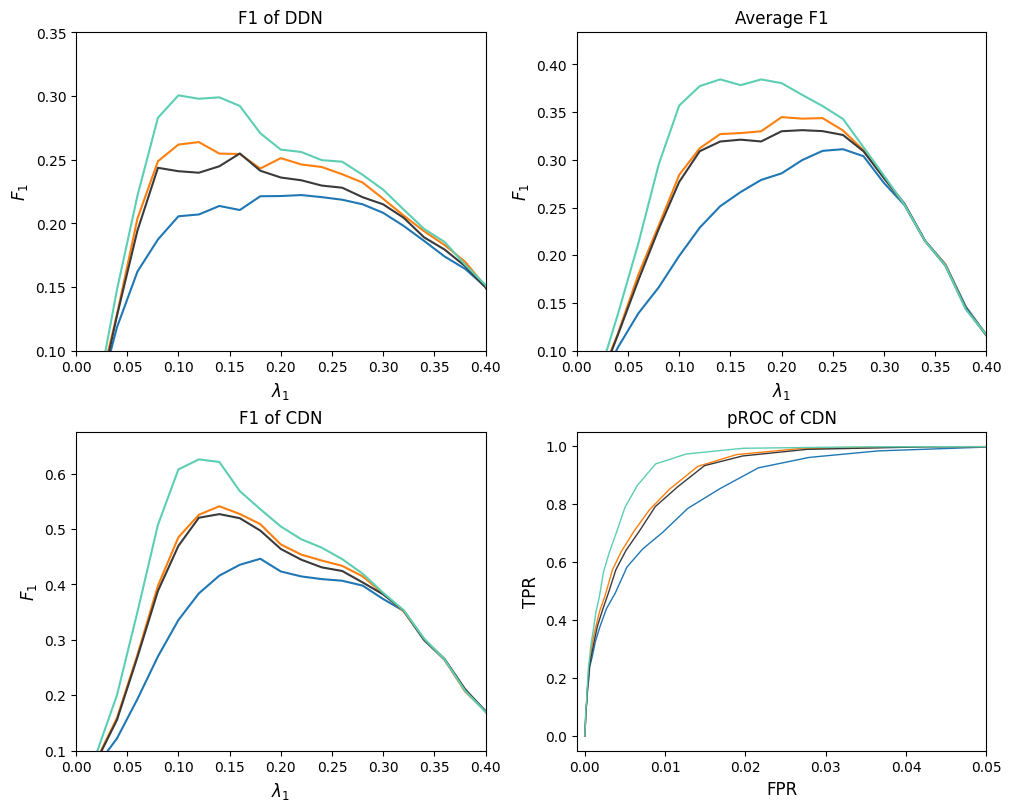

In [20]:
xrange = np.arange(0.02, 0.81, 0.02)
if node==2:
    xlim = [-0.00005, 0.0005]
else:
    xlim = [-0.001, 0.05]
fig = sim3.draw_F1_pROC_curves_for_methods(
    [p4_comm_iddn0, p4_comm_iddn1, p4_comm_iddn2, p4_comm_iddn3],
    [p4_diff_iddn0, p4_diff_iddn1, p4_diff_iddn2, p4_diff_iddn3],
    xlim=xlim,
    xlim_1d=[0, 0.4],
    ylim_1d=[0.1, 1.0],
    xrange=xrange,
)
fig.savefig(f"./temp/node_{node}_iddn_subsets_n_{n_sample}.png")